In [2]:
import os

os.environ["MKL_NUM_THREADS"]="1"
os.environ["NUMEXPR_NUM_THREADS"]="1"
os.environ["OMP_NUM_THREADS"]="1"

import sys

import pytorch_lightning as pl
from omegaconf import DictConfig, OmegaConf
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import random_split
from torch_geometric.data import DataLoader

from spatial.merfish_dataset import FilteredMerfishDataset, MerfishDataset
from spatial.models.monet_ae import MonetAutoencoder2D, TrivialAutoencoder
from spatial.train import train
from spatial.predict import test

In [3]:
test = MerfishDataset("../data")

In [57]:
test.celltype_lookup

{'Ambiguous': 0,
 'Astrocyte': 1,
 'Endothelial 1': 2,
 'Endothelial 2': 3,
 'Endothelial 3': 4,
 'Ependymal': 5,
 'Excitatory': 6,
 'Inhibitory': 7,
 'Microglia': 8,
 'OD Immature 1': 9,
 'OD Immature 2': 10,
 'OD Mature 1': 11,
 'OD Mature 2': 12,
 'OD Mature 3': 13,
 'OD Mature 4': 14,
 'Pericytes': 15}

In [48]:
import torch

responses = None
for i in range(len(test)):
    if responses is None:
        responses = test[i].x[:, test.responses]
    else:
        responses = torch.cat((responses, test[i].x[:,test.responses]), axis=0)

In [49]:
responses.shape

torch.Size([854339, 84])

In [29]:
import matplotlib.pyplot as plt

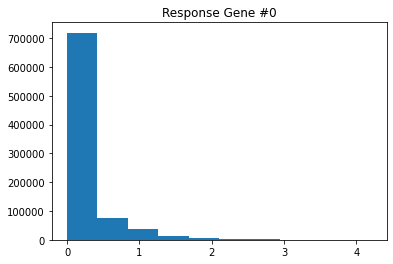

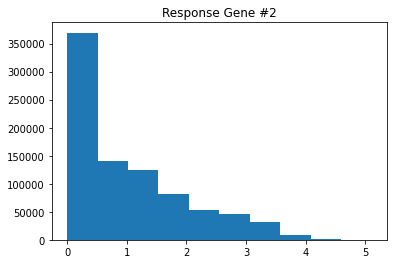

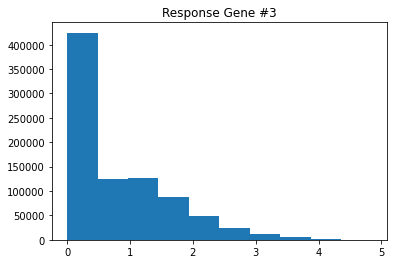

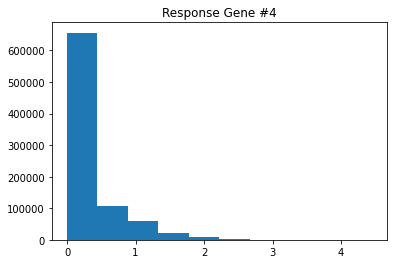

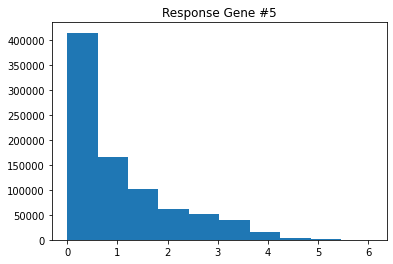

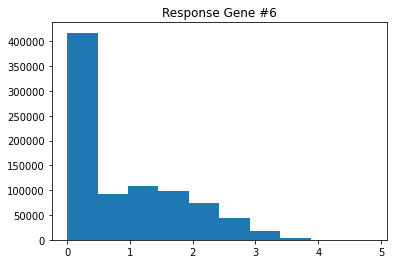

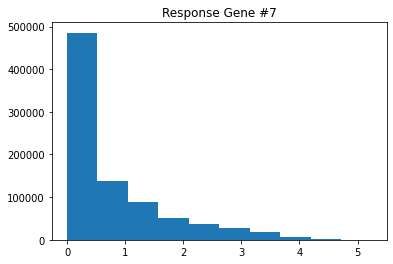

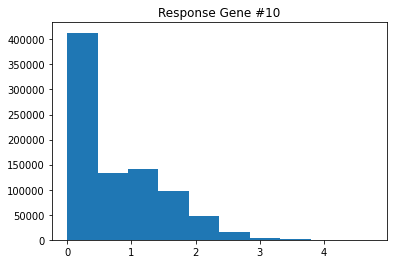

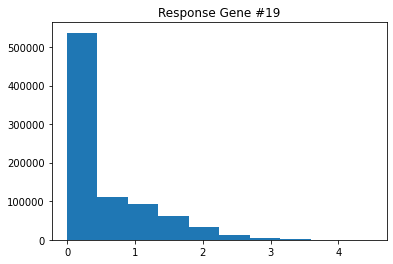

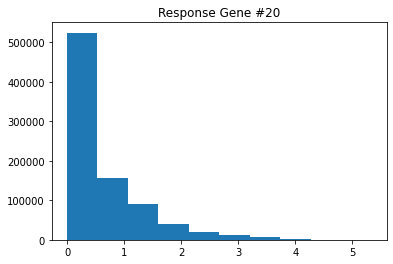

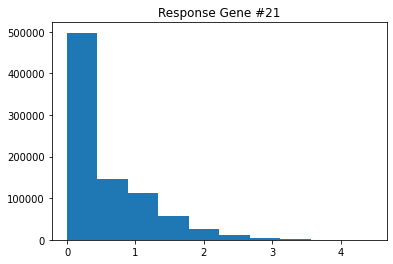

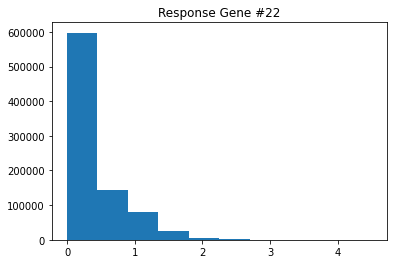

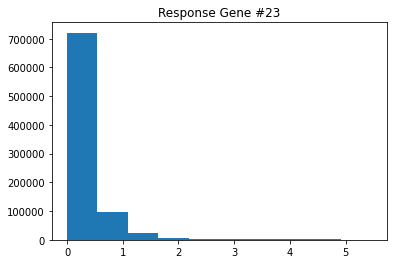

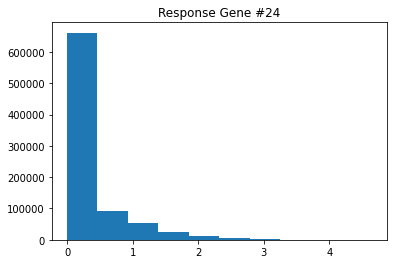

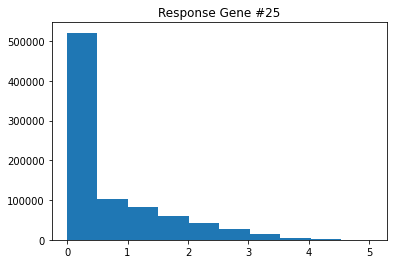

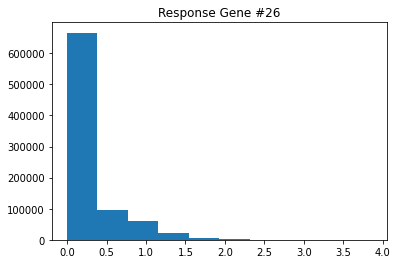

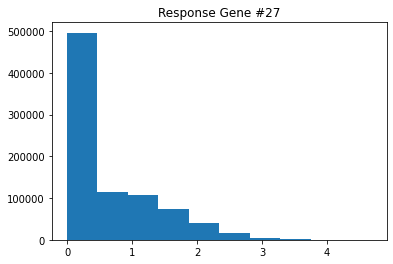

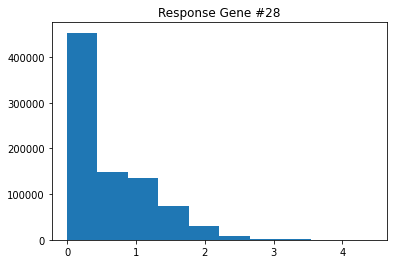

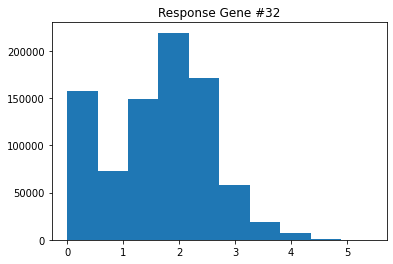

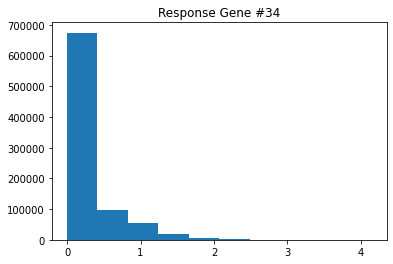

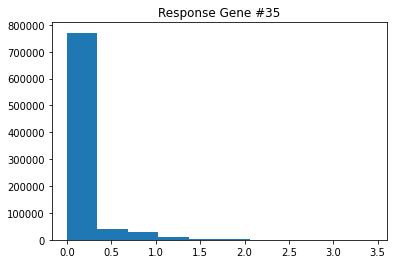

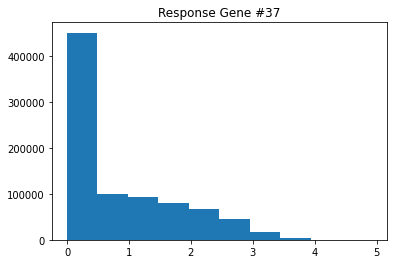

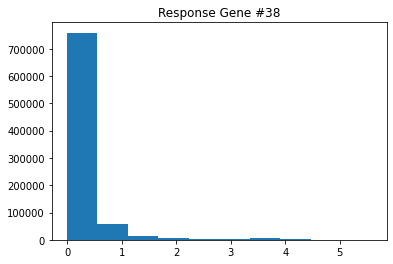

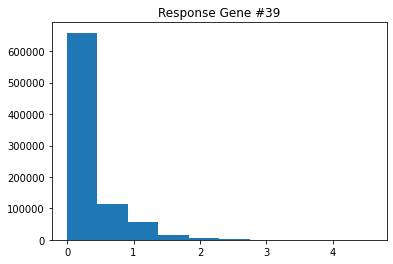

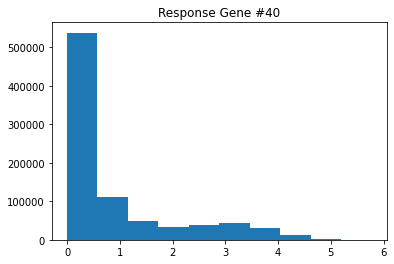

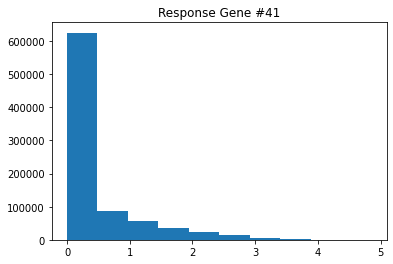

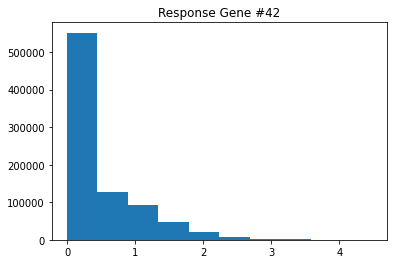

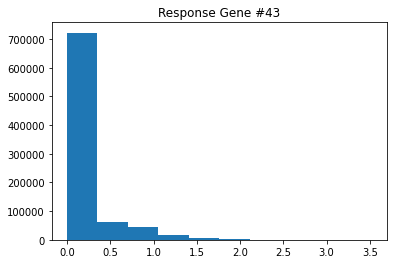

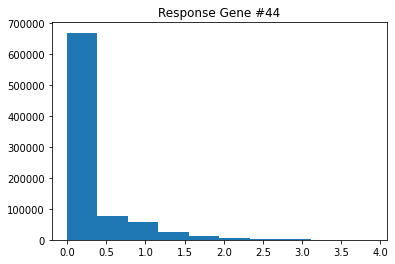

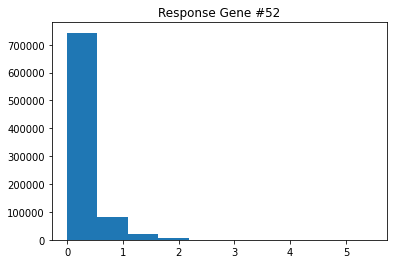

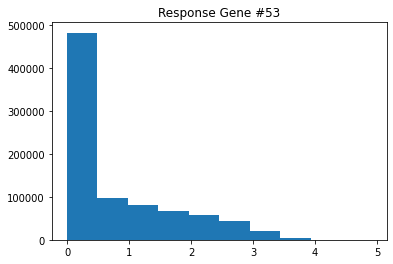

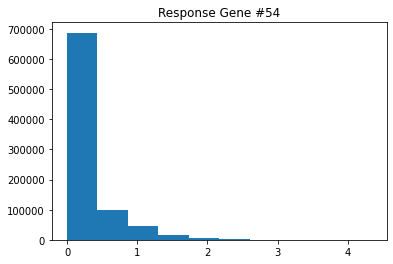

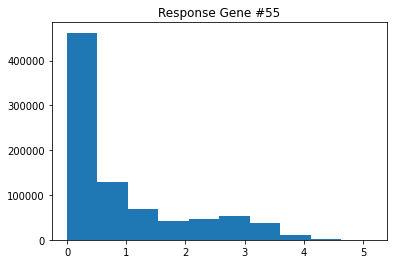

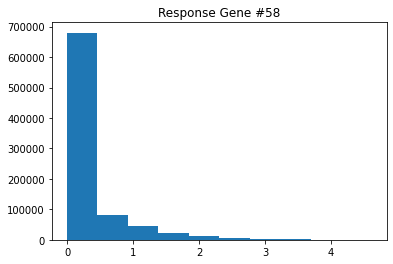

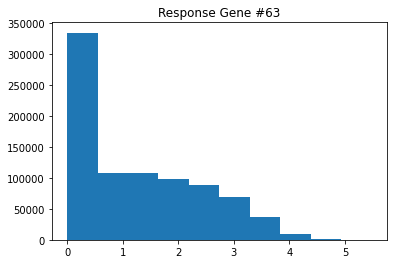

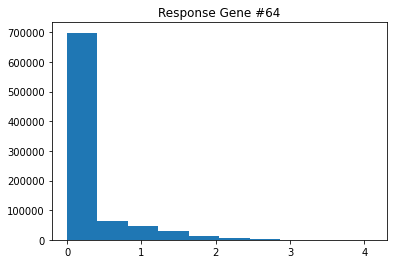

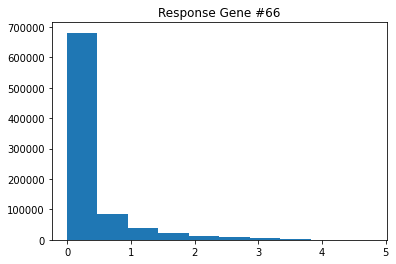

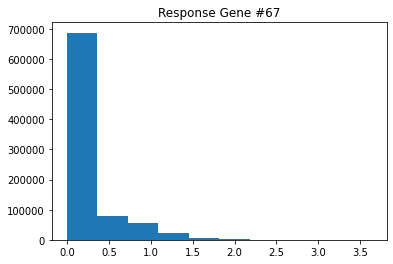

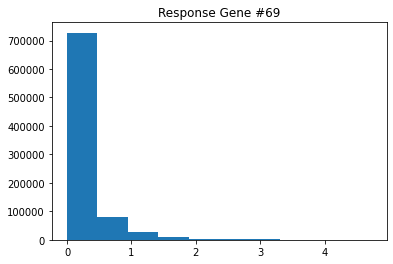

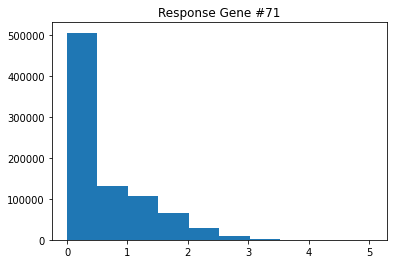

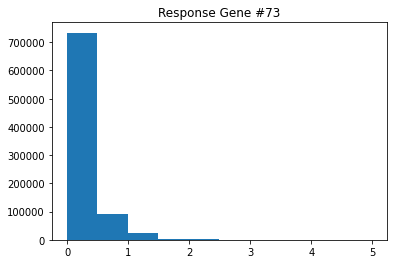

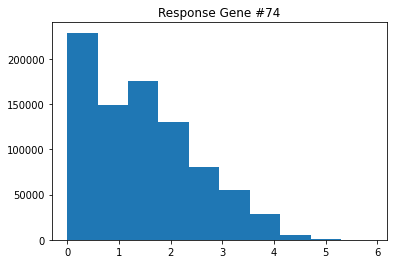

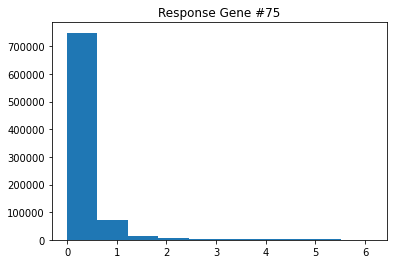

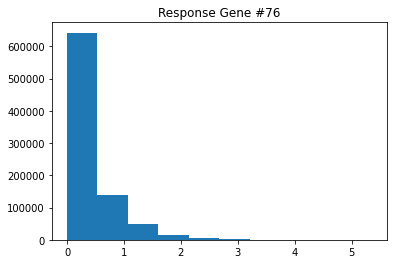

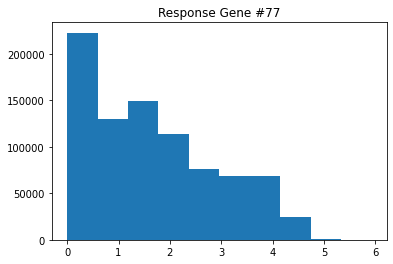

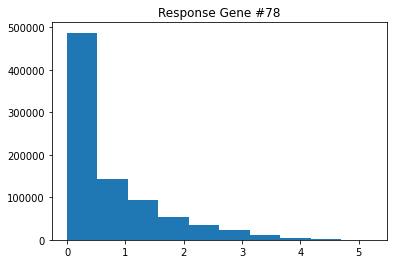

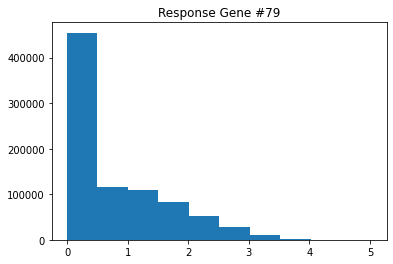

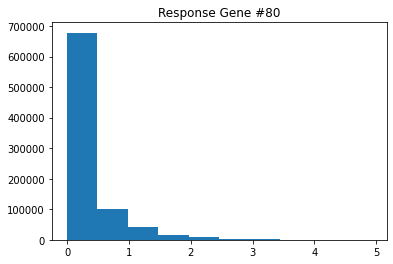

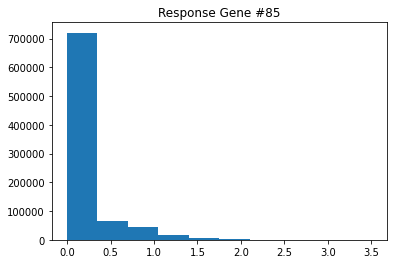

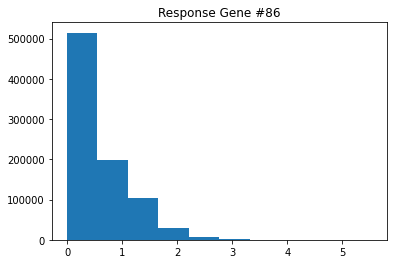

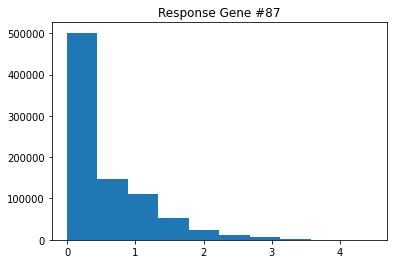

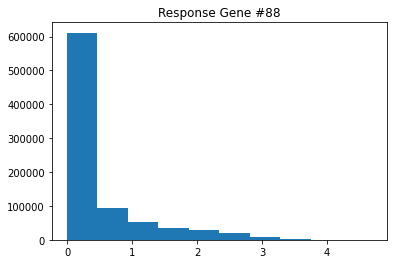

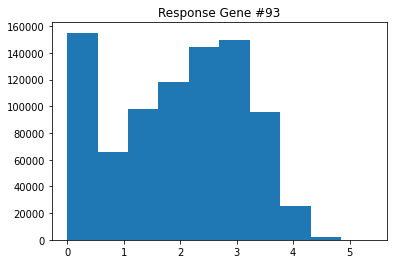

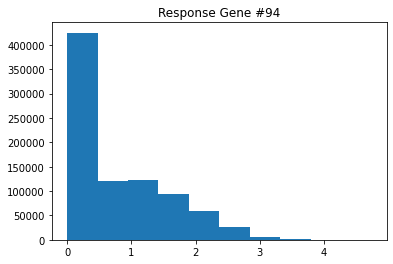

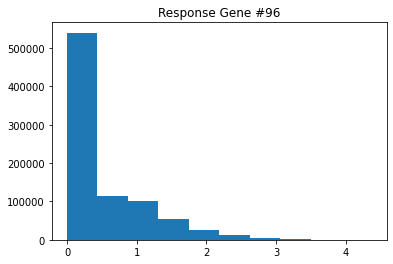

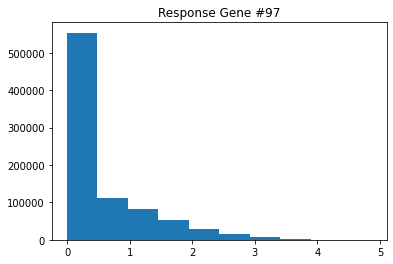

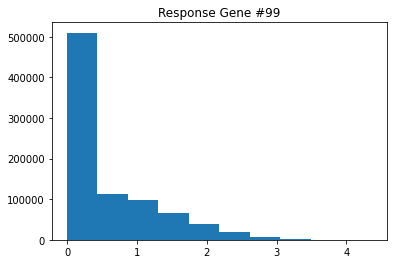

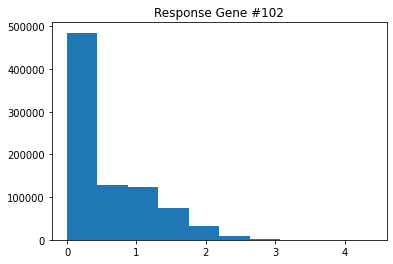

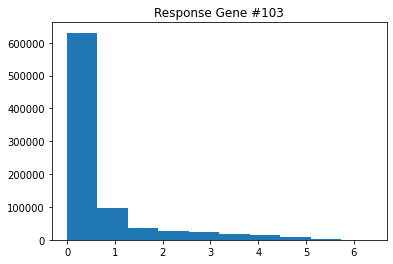

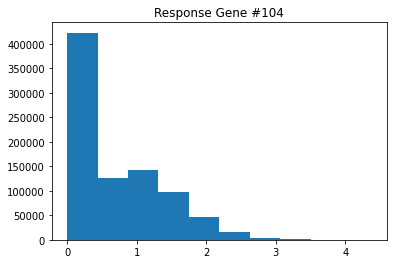

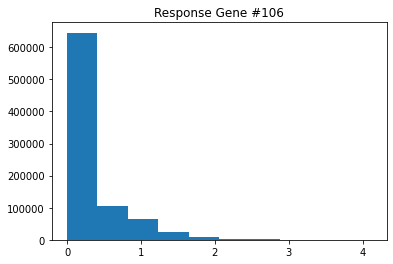

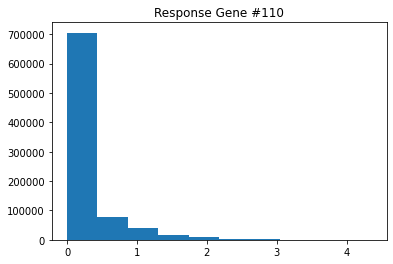

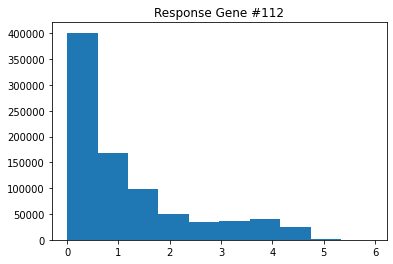

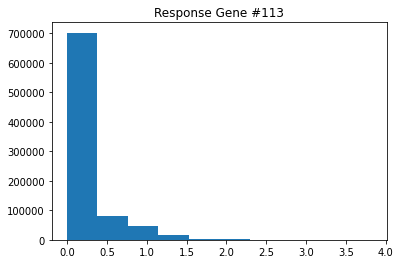

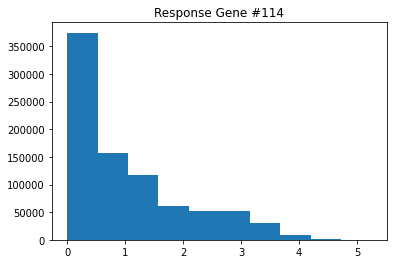

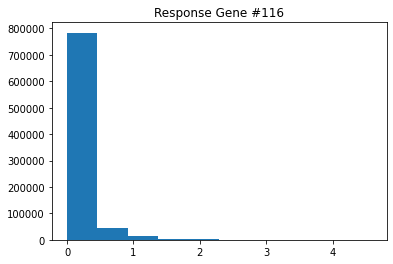

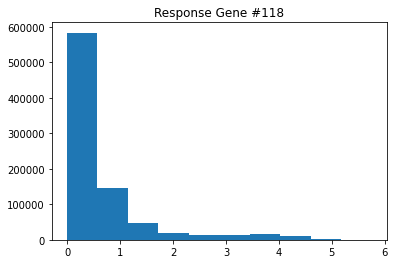

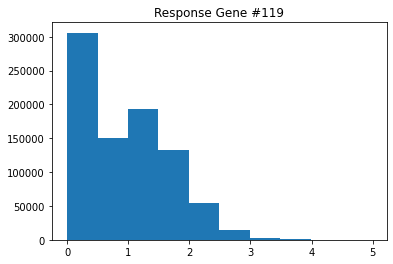

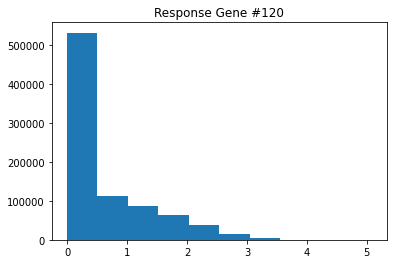

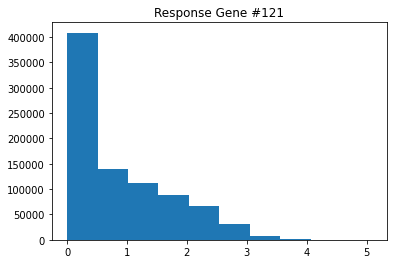

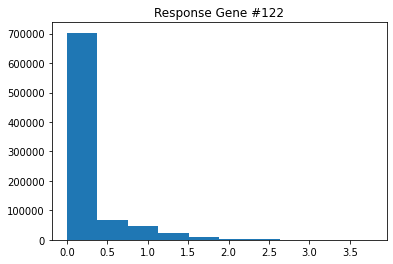

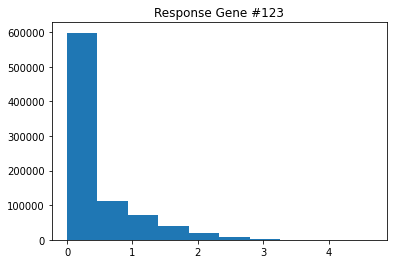

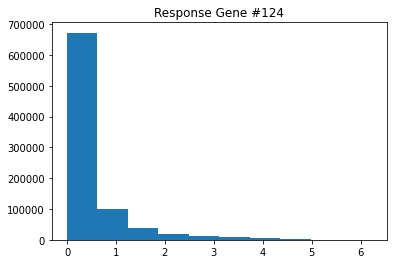

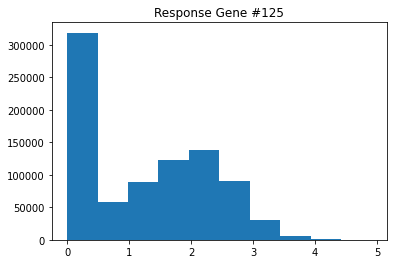

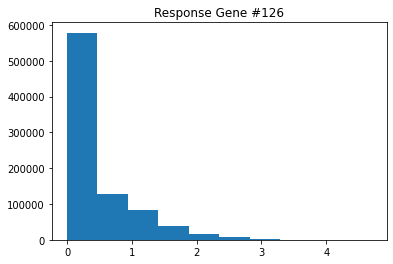

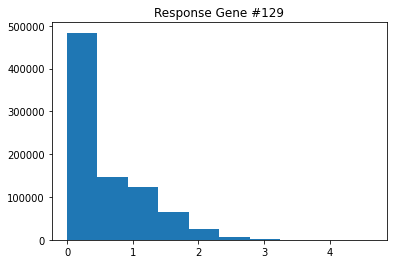

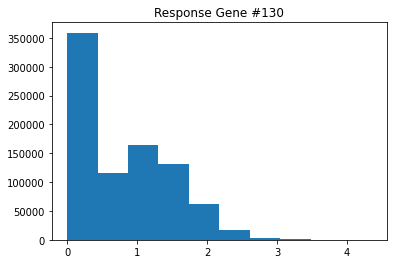

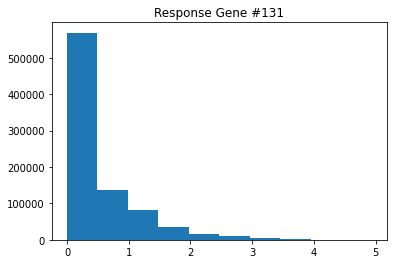

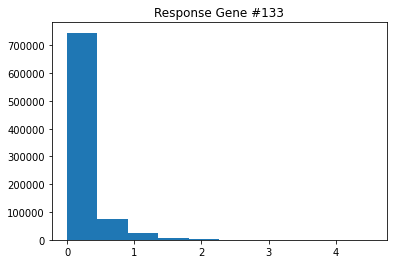

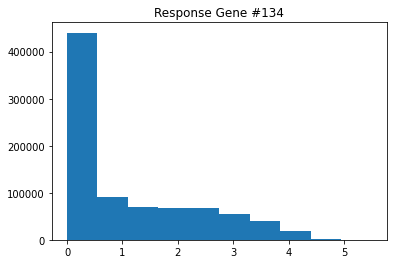

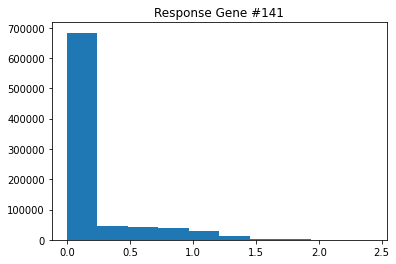

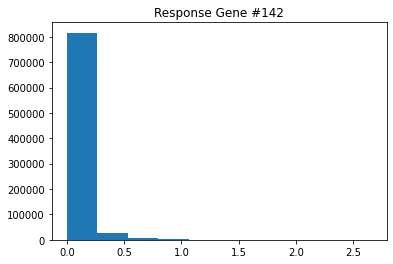

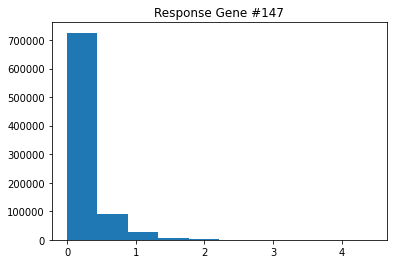

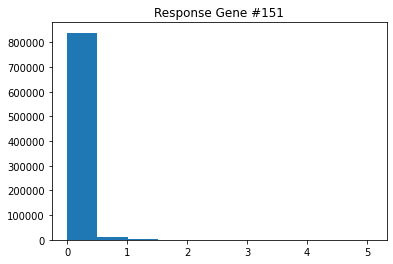

In [56]:
for i in range(responses.shape[1]):
    plt.figure()
    plt.hist(np.array(responses[:, i]), bins=10)
    plt.title(f"Response Gene #{test.responses[i]}")
    plt.show()